# 프로젝트 목표

### 이번 프로젝트는 학습 서비스를 이용하는 독자들 중 
### 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 
### 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.
#  .

### 이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 
### 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 
### 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지,
### 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.

# .

# 목표 및 가설?

## 서비스에 가입한기간이 길면 - 고인물인가...?
## 서비스에 마지막으로 로그인한 시간이 짧으면 ?
## 위의 두개 모두를 만족하면 콘크리트층인가? 단골??
# .

## 월간 활동적인 학습 일수가 많으면 - 자주 이용하는가?
# .

## 커뮤니티 참여도가 높으면 - 온라인 학습 플랫폼에 자주 들어오는가 (피드백?) !
# .

## 이를 통해 서비스 자체를 자주 이용하고 관심을 가진 사용자인지 파악하고

## 이런 사람들이 다음달에 구독을 할 지 확인


In [2]:
import pandas as pd
import numpy as np

In [4]:
df_all=pd.read_table('data/mini.csv',sep=',')
df_all ## 전체

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [6]:
df_all.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [23]:
# 필요한 데이터를 뽑아보자 !
x = ['subscription_duration','recent_login_time','monthly_active_learning_days','community_engagement_level','target']
ex_table = df_all[x]
ex_table

,subscription_duration,recent_login_time,monthly_active_learning_days,community_engagement_level,target
0,13,14,18,4,0
1,16,18,16,3,1
2,22,1,13,4,1
3,1,19,19,3,1
4,4,5,19,4,1
...,...,...,...,...,...
9995,22,29,18,5,1
9996,10,11,9,3,1
9997,7,27,24,5,1
9998,11,7,10,5,1


# 데이터를 뽑아봅시다 ! 전처리 !

In [24]:
# 전체 사용자의 월간 활동적인 일수 평균
monact_mean = df_all['monthly_active_learning_days'].mean()
print(monact_mean)

12.5454


In [25]:
# 활동일수가 평균보다 높은 사람 = 열심히 사용한 사람
over_monact_df=ex_table[ex_table['monthly_active_learning_days']>=12.5]
over_monact_df

# 5006명

,subscription_duration,recent_login_time,monthly_active_learning_days,community_engagement_level,target
0,13,14,18,4,0
1,16,18,16,3,1
2,22,1,13,4,1
3,1,19,19,3,1
4,4,5,19,4,1
...,...,...,...,...,...
9987,21,7,14,5,0
9988,12,26,18,5,1
9993,7,29,14,5,1
9995,22,29,18,5,1


In [83]:
# 전체 유저 중에서 꾸준하게 쓴 사람을 찾아보자 !
olduser_all_mean = ex_table['subscription_duration'].mean()

# 요즘 쓰는지도 확인해보자 !
rcntuser_all_mean = ex_table['recent_login_time'].mean()
print(olduser_all_mean, rcntuser_all_mean)
## 가입한지 12달은 지나야하고 다시 로그인한 일수가 15일보다 적어야 꾸준하게 쓴 사람이라고 판단된다 !

11.8974 15.0132


In [84]:
# 열심히 사용한 사람이 헤비유저...?  고인물, 단골인지 확인해보자 !
olduser_mean = over_monact_df['subscription_duration'].mean()
# 또 요즘도 쓰는 사람인지 확인해보자 !
rcntuser_mean = over_monact_df['recent_login_time'].mean()
print(olduser_mean,rcntuser_mean)

11.987215341590092 14.900119856172592


In [85]:
olduser_df=over_monact_df[over_monact_df['subscription_duration']>=12] ## 열심히 쓰는 사람 중에 옛날부터 쓴사람
olduser_df

,subscription_duration,recent_login_time,monthly_active_learning_days,community_engagement_level,target
0,13,14,18,4,0
1,16,18,16,3,1
2,22,1,13,4,1
10,19,21,13,4,0
17,15,24,14,3,1
...,...,...,...,...,...
9971,12,3,21,5,1
9983,22,23,15,5,0
9987,21,7,14,5,0
9988,12,26,18,5,1


In [87]:
concrete_df=olduser_df[olduser_df['recent_login_time']<=15] 
##옛날에 가입한지 옛날부터 계속쓴지는 모르지만 최근에 로그인한 열심히 쓰는 사람
concrete_df
# 콘크리트 층?(추정) 이 1343

,subscription_duration,recent_login_time,monthly_active_learning_days,community_engagement_level,target
0,13,14,18,4,0
2,22,1,13,4,1
37,15,9,15,3,0
46,12,4,21,3,0
57,18,5,22,4,1
...,...,...,...,...,...
9954,23,12,14,5,1
9958,21,13,19,5,0
9967,12,11,23,4,1
9971,12,3,21,5,1


In [88]:
# 커뮤니티 많이 쓰는 사람인가 ? -> 어느정도가 활동적인가 확인해보기위해서 전체의 평균을 보자 !
socialuser_mean = df_all['community_engagement_level'].mean()
print(socialuser_mean)

# 나는 여기서 4정도는 되야 많이 쓰는 사람이라고 판단이 가능하다 생각하였다.

3.8861


In [89]:
socialuser_df=ex_table[ex_table['community_engagement_level']>=4]
socialuser_df

#전체에서 6634명이나 커뮤니티를 자주쓴다. 생각보다 너무 많다... !

,subscription_duration,recent_login_time,monthly_active_learning_days,community_engagement_level,target
0,13,14,18,4,0
2,22,1,13,4,1
4,4,5,19,4,1
5,4,4,21,4,0
7,10,20,10,5,1
...,...,...,...,...,...
9994,11,6,6,4,1
9995,22,29,18,5,1
9997,7,27,24,5,1
9998,11,7,10,5,1


In [90]:
# 콘크리트층은 커뮤니티를 많이 쓸까?

social_concrete_df=concrete_df[concrete_df['community_engagement_level']>=4]
social_concrete_df ## 커뮤니티를 많이 쓰는 단골유저의 df 가 나왔다 !


#콘크리트 층 1343
#이 중에도 커뮤니티 활발하게 사용하는 사람은 879
# 상당히 커뮤니티가 잘 되어 있는 것 같다. 전체 평균도 높고 대다수가 5인 것 같다.

,subscription_duration,recent_login_time,monthly_active_learning_days,community_engagement_level,target
0,13,14,18,4,0
2,22,1,13,4,1
57,18,5,22,4,1
72,15,5,14,5,1
77,21,1,24,5,1
...,...,...,...,...,...
9954,23,12,14,5,1
9958,21,13,19,5,0
9967,12,11,23,4,1
9971,12,3,21,5,1


In [91]:
social_concrete_mean = social_concrete_df['community_engagement_level'].mean()
print(social_concrete_mean)

# 4.5가 넘는 것을 보니 고인물의 대다수가 커뮤니티 사용에서 최고점을 찍고 있다.
# 커뮤니티 진짜 잘만들었나보다... 커뮤니티라는 장점을 극대화한다면 콘크리트 층을 만들 수 있다고 판단할 수도 있을 것 같다 !

4.649601820250284


#### 이렇게 열심히 그리고 꾸준히 서비스를 사용하는 사람들을 다음달에 구독을 하는지 안하는지 이제 확인을 해봐야한다..!

In [101]:
yes_or_no_df = social_concrete_df.groupby('target')
yes_df = yes_or_no_df.get_group(1)
no_df = yes_or_no_df.get_group(0)

yes_or_no_all_df = ex_table.groupby('target')
yes_all = yes_or_no_all_df.get_group(1)
no_all = yes_or_no_all_df.get_group(0)

## yes
### 월간 활동적인 학습 일수가 평균보다 높은 활동적인 사람 중에
### 서비스 가입한 기간도 길고 최근도 로그인한 꾸준히 오래 쓰고있는 콘크리트층에서
### 다음 달에도 구독을 하는 사람의 수 ! :554명

In [93]:
yes_df.count()
#554명

subscription_duration           554
recent_login_time               554
monthly_active_learning_days    554
community_engagement_level      554
target                          554
dtype: int64

In [94]:
yes_df.head()

,subscription_duration,recent_login_time,monthly_active_learning_days,community_engagement_level,target
2,22,1,13,4,1
57,18,5,22,4,1
72,15,5,14,5,1
77,21,1,24,5,1
89,15,13,21,4,1


## no
### 월간 활동적인 학습 일수가 평균보다 높은 활동적인 사람 중에
### 서비스 가입한 기간도 길고 최근도 로그인한 꾸준히 오래 쓰고있는 콘크리트층에서
### 다음 달에는 구독을 안하는 사람의 수 ! :325명

In [97]:
no_df.count()
#325명

subscription_duration           325
recent_login_time               325
monthly_active_learning_days    325
community_engagement_level      325
target                          325
dtype: int64

In [96]:
no_df.head()

,subscription_duration,recent_login_time,monthly_active_learning_days,community_engagement_level,target
0,13,14,18,4,0
91,21,12,20,4,0
130,18,3,19,5,0
167,13,3,16,5,0
224,16,13,21,4,0


# 시각화를 해보자 !

In [77]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [102]:
subscribe_allcnt=len(yes_all)
no_subscribe_allcnt=len(no_all)

subscribe_cnt=len(yes_df)
no_subscribe_cnt=len(no_df)

print(subscribe_allcnt, no_subscribe_allcnt,subscribe_cnt, no_subscribe_cnt)

6199 3801 554 325


### 월간 활동적인 학습 일수가 평균보다 높은 활동적인 사람 중에
### 서비스 가입한 기간도 길고 최근도 로그인한 꾸준히 오래 쓰고있는 콘크리트층에서 재구독 유무를 나타냈다.

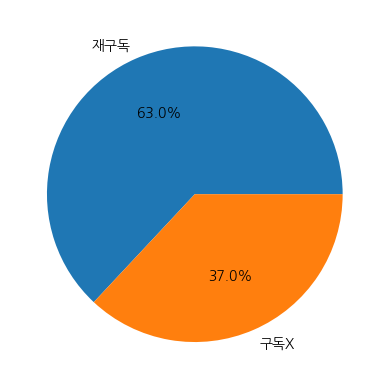

In [103]:
labels = ['재구독','구독X']
ratio = [subscribe_cnt,no_subscribe_cnt]

plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.show()

## 전체 사용자의 다음달 재구독 비율을 보고 차이가 있나 확인을 해보기 위해 시각화 해보자 !

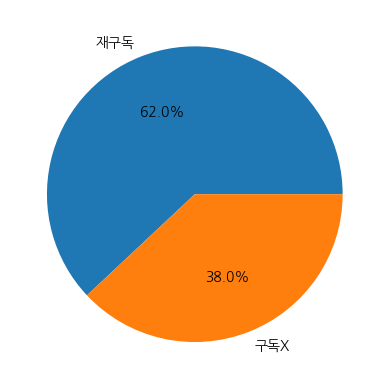

In [104]:
labels = ['재구독','구독X']
ratio = [subscribe_allcnt,no_subscribe_allcnt]

plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.show()

#  1차 결론 - 2024년 03월 31일

### 온라인 학습 플랫폼에서 월간 활동량도 많고 오래전부터 사용하고 최근에도 사용하는 사람
### 즉 꾸준히 사용했을 것이라고 판단한 갓생러들은 
### 이 플랫폼에서 커뮤니티가 어떠한 부분을 보충해주는 서비스인지는 잘 모르지만
# .
## 본인은 학습에는 소통이 매우 중요하다고 생각하는 사람으로
## 이러한 사람들이 커뮤니티도 열심히 할 것으로 예상하였고 이는 어느정도 가설이 맞았다.
.
## 분명 서비스에 만족하기 때문에 그러한 결과를 보였다고 생각해서
## 재구독의 비율이 구독취소의 비율보다 높을 것으로 예상했으나
.
# 그러한 특정 콘크리트 유저들의 재구독율이 63%
# 전체 유저의 재구독율 62%
# .
## 결국 오랫동안 열심히 만족하며 쓴사람 또한 전체와 비슷한 재구독율을 보여주고 있으므로 
# 의미가 딱히 없는 것 같다.
# .

# 매몰되어서 2번 엎었다.
# 결국 마지막에 파이썬으로 해보았으나 원하는 결과를 내지 못하였고
# 왜 콘크리트층이 전체와 유사한 재구독율을 보이는지 이유를 알고 싶었다.